# Masterthesis
#### Julian Jetz

In [37]:
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
from scipy import stats
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
na_values = ['nan', 'N/A', 'NaN', 'NaT']

In [3]:
def get_merged_csv(flist, **kwargs):
    return pd.concat([pd.read_csv(f, **kwargs) for f in flist], ignore_index=True)

In [4]:
df = get_merged_csv(glob.glob('csvfiles/*.csv'), na_values=na_values, index_col=False, dtype = {"TYPE" : "str", "TYPEQ" : "str", "TYPTRK" : "str", "WEATHER" : "str", "VISIBLTY" : "str"})
df.shape[0]

/Users/julianjetz/anaconda3/envs/masterthesis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (119) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/julianjetz/anaconda3/envs/masterthesis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (119,128,129,130,131,132,133,134,135) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/julianjetz/anaconda3/envs/masterthesis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,27,41,119,125,126,127,128,129,130,131,132,133,134,135) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


62846

In [5]:
df.dtypes

IYR           int64
IMO           int64
RAILROAD     object
INCDTNO      object
IYR2        float64
             ...   
MOPERA      float64
ADJUNCT1     object
ADJUNCT2     object
ADJUNCT3     object
SUBDIV       object
Length: 145, dtype: object

In [6]:
df['TYPE'].dtype

dtype('O')

In [7]:
pd.set_option('display.max_columns', 500)
df.head(50)

,IYR,IMO,RAILROAD,INCDTNO,IYR2,IMO2,RR2,INCDTNO2,IYR3,IMO3,RR3,INCDTNO3,DUMMY1,GXID,YEAR,MONTH,DAY,TIMEHR,TIMEMIN,AMPM,TYPE,CARS,CARSDMG,CARSHZD,EVACUATE,DIVISION,STATION,MILEPOST,STATE,TEMP,VISIBLTY,WEATHER,TRNSPD,TYPSPD,TRNNBR,TRNDIR,TONS,TYPEQ,EQATT,TRKNAME,TRKCLAS,TRKDNSTY,TYPTRK,RRCAR1,CARNBR1,POSITON1,LOADED1,RRCAR2,CARNBR2,POSITON2,LOADED2,HEADEND1,MIDMAN1,MIDREM1,RMAN1,RREM1,HEADEND2,MIDMAN2,MIDREM2,RMAN2,RREM2,LOADF1,LOADP1,EMPTYF1,EMPTYP1,CABOOSE1,LOADF2,LOADP2,EMPTYF2,EMPTYP2,CABOOSE2,EQPDMG,TRKDMG,CAUSE,CAUSE2,CASKLDRR,CASINJRR,CASKLD,CASINJ,ACCAUSE,ACCTRK,ACCTRKCL,HIGHSPD,ACCDMG,DUMMY2,STCNTY,TOTINJ,DUMMY3,TOTKLD,ENGRS,FIREMEN,CONDUCTR,BRAKEMEN,ENGHR,ENGMIN,CDTRHR,CDTRMIN,JOINTCD,REGION,DUMMY4,TYPRR,DUMMY5,RRDIV,METHOD,NARRLEN,DUMMY6,YEAR4,RREMPKLD,RREMPINJ,PASSKLD,PASSINJ,OTHERKLD,OTHERINJ,COUNTY,CNTYCD,ALCOHOL,DRUG,DUMMY7,PASSTRN,SSB1,SSB2,NARR1,NARR2,NARR3,NARR4,NARR5,NARR6,NARR7,NARR8,NARR9,NARR10,NARR11,NARR12,NARR13,NARR14,NARR15,RCL,Latitude,Longitud,SIGNAL,MOPERA,ADJUNCT1,ADJUNCT2,ADJUNCT3,SUBDIV
0,1,3,ATK,067298,NaN,NaN,NaN,NaN,1,3,UP,0301RS044,NaN,NaN,1,3,25,8,31,AM,01,0,0,0,0,WSD,OAKLAND,0005.0,6,60,2,1,2,E,231,4.0,0,8,Y,SHOP SIDE,1,000000,2,ATK,281,2,NaN,NaN,NaN,0,NaN,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7000,0,T108,NaN,0,0,0,0,T108,2.0,1,2,7400,NaN,06C001,0,0,0,2.0,0.0,1.0,1.0,1.0,10.0,1.0,10.0,1,7,NaN,1L,NaN,NaN,N,231,NaN,2001,0,0,0,0,0,0,ALAMEDA,1.0,NaN,NaN,NaN,N,NaN,NaN,UNITS 231-281(BACK TO BACK) WERE COMING INTO ...,ECENTLY REPAIRED SWITCH PLATE AND DERAILED. TH...,AT IT WAS TOO SHARP OF A CURVE.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,3,ATK,067334,NaN,NaN,NaN,NaN,1,3,ATK,067334,NaN,NaN,1,3,31,4,0,AM,11,0,0,0,0,NED,SPRINGFIELD,0061.2,25,31,4,1,0,E,286,1.0,0,8,N,6,1,000.00,2,ATK,286,1,NaN,NaN,NaN,0,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25000,0,E79L,NaN,0,0,0,0,E79L,2.0,1,0,25000,NaN,25C013,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1,1,NaN,1L,NaN,NaN,N,95,NaN,2001,0,0,0,0,0,0,HAMPDEN,13.0,NaN,NaN,NaN,N,NaN,NaN,"ENGINE 286 CAUGHT FIRE AT THE SPRINGFIELD, MA ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,ATK,067292,NaN,NaN,NaN,NaN,1,3,ATK,067292,NaN,NaN,1,3,29,3,50,PM,01,0,0,0,0,WTR,CHICAGO,0000.5,17,38,2,2,5,R,4,1.0,0,2,Y,4/28,1,000000,1,AMT,44834,5,Y,NaN,NaN,0,NaN,4,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,2,0,0,0,7500,500,E79L,NaN,0,0,0,0,E79L,1.0,1,5,8000,NaN,17C031,0,0,0,1.0,1.0,0.0,1.0,4.0,47.0,NaN,NaN,1,4,NaN,1L,NaN,NaN,F,387,NaN,2001,0,0,0,0,0,0,COOK,31.0,NaN,NaN,NaN,Y,NaN,NaN,TRAIN NO.#4 WITH ENGS 83/11/90/44 AND 11 CARS ...,KING A SHOVING MOVE ONTO TRACK 28. THE DERAIL...,DEADHEADING AMFLEET CAR 44834 LOCATED DIRECTLY...,Y FOUR P42 LOCOMOTIVES SHOVING TRAIN AGAINST A...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,3,ATK,067665,NaN,NaN,NaN,NaN,1,3,ATK,067665,NaN,NaN,1,3,29,4,57,AM,01,0,0,0,0,MID,PHILADELPHIA,0001.5,42,40,4,2,4,E,624,2.0,0,2,Y,30 TRACK,1,000000,2,ATK,48223,13,N,NaN,NaN,0,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,2,0,10000,0,H303,NaN,0,0,0,0,H303,2.0,1,4,10000,NaN,42C101,0,0,0,1.0,0.0,1.0,1.0,6.0,57.0,6.0,57.0,1,2,NaN,1L,NaN,NaN,L,122,NaN,2001,0,0,0,0,0,0,PHILADELPHIA,101.0,0.0,0.0,NaN,N,NaN,NaN,WHILE SHOVING TRAIN 624 SOUTH ON #30 TRACK AT ...,AND 2 CARS DERAILED .,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,3,ATK,066864,NaN,NaN,NaN,NaN,1,3,UP,0301LA069,NaN,NaN,1,3,4,7,10,PM,09,0,0,0,0,WSD,SANTA BARBARA,0370.4,6,48,4,3,45,R,786,3.0,0,2,Y,MAIN,3,000000,1,ATK,462,1,NaN,NaN,NaN,0,NaN,1,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,15972,0,M404,NaN,0,0,0,0,M404,1.0,3,45,15972,NaN,06C083,0,0,0,1.0,0.0,1.0,1.0,8.0,50.0,9.0,5.0,1,7,NaN,1L,NaN,NaN,K,66,NaN,2001,0,0,0,0,0,0,SANTA BARBARA,83.0,NaN,NaN,NaN,Y,NaN,NaN,TRAIN 786 WAS STRUCK BY A FALLING TREE SOUTH O...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,3,ATK,066907,1.0,3.0,NJTR,200104215,1,3,ATK,066907,NaN

In [8]:
df['IYR'].unique()

array([ 1, 15,  9,  0,  3,  2, 14, 12, 13,  5, 16, 18,  4,  6, 11, 17,  7,
       10,  8, 19])

In [9]:
df=df.dropna(subset=['YEAR', 'MONTH', 'TYPE', 'LOADF1', 'LOADP1', 'EMPTYF1', 'EMPTYP1','LOADF2', 'LOADP2', 'EMPTYF2', 'EMPTYP2','TONS', 'TYPEQ', 'TYPTRK', 'TEMP', 'VISIBLTY', 'WEATHER', 'COUNTY', 'TRNSPD', 'ACCDMG', 'ACCAUSE']);

df.shape[0]


58228

In [10]:
std_dev = 3
df = df[(np.abs(stats.zscore(df[['LOADF1', 'LOADP1', 'EMPTYF1', 'EMPTYP1','LOADF2', 'LOADP2', 'EMPTYF2', 'EMPTYP2','TONS', 'TEMP', 'ACCDMG']])) < float(std_dev)).all(axis=1)]

In [11]:
x_data = df[['YEAR', 'MONTH', 'LOADF1', 'LOADP1', 'EMPTYF1', 'EMPTYP1','LOADF2', 'LOADP2', 'EMPTYF2', 'EMPTYP2','TONS', 'TEMP', 'TRNSPD', 'ACCAUSE', 'TYPE', 'TYPEQ', 'TYPTRK', 'VISIBLTY', 'WEATHER', 'COUNTY']]
y = df['ACCDMG']

In [12]:
#scaler = MinMaxScaler()
#x_data = pd.DataFrame(scaler.fit_transform(x_data), columns=x_data.columns, index=x_data.index)

In [13]:
#cause_dummies= pd.get_dummies(df['ACCAUSE'], prefix='cause')
#x_data = pd.concat([x_data, df[['ACCAUSE', 'TYPE', 'TYPEQ', 'TYPTRK', 'VISIBLTY', 'WEATHER', 'COUNTY']], axis=1)

In [14]:
x_data.describe(include='all')

,YEAR,MONTH,LOADF1,LOADP1,EMPTYF1,EMPTYP1,LOADF2,LOADP2,EMPTYF2,EMPTYP2,TONS,TEMP,TRNSPD,ACCAUSE,TYPE,TYPEQ,TYPTRK,VISIBLTY,WEATHER,COUNTY
count,50497.000000,50497.000000,50497.000000,50497.000000,50497.000000,50497.000000,50497.000000,50497.0,50497.000000,50497.0,50497.000000,50497.000000,50497.000000,50497,50497,50497,50497,50497,50497,50497
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370,13,14,4,4,6,1430
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H702,01,1,2,2,1,COOK
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2720,30205,21121,29947,24458,33642,2278
mean,8.169535,6.426184,27.459473,0.067469,13.679427,0.010416,1.657425,0.0,0.751193,0.0,2925.047349,58.974375,10.236351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.584459,3.416471,31.189223,0.531582,20.761844,0.151469,2.576556,0.0,1.569157,0.0,3984.404075,21.569836,13.554121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,-7.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,42.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.000000,6.000000,16.000000,0.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.0,930.000000,60.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,13.000000,9.000000,44.000000,0.000000,20.000000,0.000000,3.000000,0.0,1.000000,0.0,4815.000000,75.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
y.describe(include='all')

count    5.049700e+04
mean     6.931486e+04
std      1.354330e+05
min      0.000000e+00
25%      1.429500e+04
50%      2.584700e+04
75%      6.095300e+04
max      1.539961e+06
Name: ACCDMG, dtype: float64

In [36]:
y.sample(50)

43511     103725
8704      249329
13821      93728
9316      110424
36762      23204
26520      53855
17495      19000
12018      17700
30970      70000
17723      14730
52757      67150
49877    1212272
33948      13815
31004     470450
24639      24182
44139     114731
48710     436551
18016      37700
49982      31131
22850      43050
50633      33500
53305      53494
11065      71140
12157      14171
39492      16901
9799       15000
61599      43935
39972       9040
1011        7655
8449       33414
7737       25357
8344       20600
26933      28900
9516        9150
50353      35773
52088      35000
45477      17805
24628      44643
34525      32023
13999     178952
25503      26420
31590       8200
25360      46225
59849      44728
36143      19304
53209      13931
596        17624
53450     147862
28441      29815
18169     121959
Name: ACCDMG, dtype: int64

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size=0.3)

In [17]:
trnspd = tf.feature_column.numeric_column('TRNSPD')
year = tf.feature_column.numeric_column('YEAR')
month = tf.feature_column.numeric_column('MONTH')
loadf1 = tf.feature_column.numeric_column('LOADF1')
loadp1 = tf.feature_column.numeric_column('LOADP1')
emptyf1 = tf.feature_column.numeric_column('EMPTYF1')
emptyp1 = tf.feature_column.numeric_column('EMPTYP1')
loadf2 = tf.feature_column.numeric_column('LOADF2')
loadp2 = tf.feature_column.numeric_column('LOADP2')
emptyf2 = tf.feature_column.numeric_column('EMPTYF2')
emptyp2 = tf.feature_column.numeric_column('EMPTYP2')
tons = tf.feature_column.numeric_column('TONS')
temp = tf.feature_column.numeric_column('TEMP')

In [18]:
df[['ACCAUSE', 'TYPE', 'TYPEQ', 'TYPTRK', 'VISIBLTY', 'WEATHER', 'COUNTY']].astype(str).values

array([['T108', '01', '8', ..., '2', '1', 'ALAMEDA'],
       ['E79L', '11', '8', ..., '4', '1', 'HAMPDEN'],
       ['H018', '06', '7', ..., '2', '1', 'FAYETTE'],
       ...,
       ['H307', '13', '7', ..., '1', '1', 'SWEETWATER'],
       ['H302', '12', '1', ..., '4', '1', 'CONVERSE'],
       ['H704', '01', '7', ..., '2', '2', 'LARAMIE']], dtype=object)

In [19]:
accause = tf.feature_column.categorical_column_with_hash_bucket('ACCAUSE',hash_bucket_size=1000)

embedding_size = int(math.floor(len(x_data['ACCAUSE'].unique())**0.25))
accause=tf.feature_column.embedding_column(accause, dimension=embedding_size)

In [20]:
acctype = tf.feature_column.categorical_column_with_hash_bucket('TYPE',hash_bucket_size=1000)

embedding_size = int(math.floor(len(x_data['TYPE'].unique())**0.25))
acctype=tf.feature_column.embedding_column(acctype, dimension=embedding_size)

In [21]:
typeq = tf.feature_column.categorical_column_with_hash_bucket('TYPEQ',hash_bucket_size=1000)

embedding_size = int(math.floor(len(x_data['TYPEQ'].unique())**0.25))
typeq=tf.feature_column.embedding_column(typeq, dimension=embedding_size)

In [22]:
typtrk = tf.feature_column.categorical_column_with_hash_bucket('TYPTRK',hash_bucket_size=1000)

embedding_size = int(math.floor(len(x_data['TYPTRK'].unique())**0.25))
typtrk=tf.feature_column.embedding_column(typtrk, dimension=embedding_size)

In [23]:
visibility = tf.feature_column.categorical_column_with_hash_bucket('VISIBLTY',hash_bucket_size=1000)

embedding_size = int(math.floor(len(x_data['VISIBLTY'].unique())**0.25))
visibility=tf.feature_column.embedding_column(visibility, dimension=embedding_size)

In [24]:
weather = tf.feature_column.categorical_column_with_hash_bucket('WEATHER',hash_bucket_size=1000)

embedding_size = int(math.floor(len(x_data['WEATHER'].unique())**0.25))
weather=tf.feature_column.embedding_column(weather, dimension=embedding_size)

In [25]:
county = tf.feature_column.categorical_column_with_hash_bucket('COUNTY',hash_bucket_size=1000)

embedding_size = int(math.floor(len(x_data['COUNTY'].unique())**0.25))
county=tf.feature_column.embedding_column(county, dimension=embedding_size)

In [26]:
feature_col =[year, month, trnspd, typeq, loadf1, loadp1, emptyf1, emptyp1, loadf2, loadp2, emptyf2, emptyp2, typtrk, acctype, accause, visibility, weather, temp, county]

In [27]:
opti = tf.optimizers.Adam(learning_rate = 0.01)
#was ist learning rate? -> Arbeit

In [28]:
input_func= tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_train, 
                                                y= y_train, 
                                                batch_size=10, 
                                                num_epochs=1000, 
                                                shuffle=True)

In [29]:
test_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_test,                                                   
                                                 batch_size=100, 
                                                 num_epochs=1, 
                                                 shuffle=False)
eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_test,
                                                      y=y_test, 
                                                      batch_size=10, 
                                                      num_epochs=1, 
                                                      shuffle=False)

In [30]:
estimator = tf.estimator.DNNRegressor(hidden_units=[9,9,3], feature_columns=feature_col, optimizer=opti)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/4y/xfd9r0rd0jz001c3ts8044dr0000gn/T/tmptfv5fjo4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a4af8a450>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [31]:
estimator.train(input_fn=input_func, max_steps=50000)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/4y/xfd9r0rd0jz001c3ts8044dr0000gn/T/tmptfv5fjo4/model.ckpt.
INFO:tensorflow:loss = 1651920400.0, step = 0
INFO:tensorflow:global_step/sec: 51.6867
INFO:tensorflow:loss = 106

INFO:tensorflow:loss = 27827984000.0, step = 5500 (0.364 sec)
INFO:tensorflow:global_step/sec: 258.478
INFO:tensorflow:loss = 4015960000.0, step = 5600 (0.387 sec)
INFO:tensorflow:global_step/sec: 245.455
INFO:tensorflow:loss = 15409466000.0, step = 5700 (0.407 sec)
INFO:tensorflow:global_step/sec: 253.94
INFO:tensorflow:loss = 2166921700.0, step = 5800 (0.394 sec)
INFO:tensorflow:global_step/sec: 252.819
INFO:tensorflow:loss = 3923599400.0, step = 5900 (0.396 sec)
INFO:tensorflow:global_step/sec: 262.805
INFO:tensorflow:loss = 1603942800.0, step = 6000 (0.381 sec)
INFO:tensorflow:global_step/sec: 255.404
INFO:tensorflow:loss = 1510330400.0, step = 6100 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.274
INFO:tensorflow:loss = 6494566400.0, step = 6200 (0.392 sec)
INFO:tensorflow:global_step/sec: 266.339
INFO:tensorflow:loss = 9462594000.0, step = 6300 (0.375 sec)
INFO:tensorflow:global_step/sec: 245.367
INFO:tensorflow:loss = 776567200.0, step = 6400 (0.408 sec)
INFO:tensorflow:globa

INFO:tensorflow:loss = 290649730.0, step = 13500 (0.360 sec)
INFO:tensorflow:global_step/sec: 275.857
INFO:tensorflow:loss = 1198606000.0, step = 13600 (0.363 sec)
INFO:tensorflow:global_step/sec: 261.926
INFO:tensorflow:loss = 868161150.0, step = 13700 (0.382 sec)
INFO:tensorflow:global_step/sec: 273.008
INFO:tensorflow:loss = 3437593900.0, step = 13800 (0.366 sec)
INFO:tensorflow:global_step/sec: 265.858
INFO:tensorflow:loss = 11240628000.0, step = 13900 (0.376 sec)
INFO:tensorflow:global_step/sec: 260.698
INFO:tensorflow:loss = 3183794700.0, step = 14000 (0.384 sec)
INFO:tensorflow:global_step/sec: 243.337
INFO:tensorflow:loss = 4161235000.0, step = 14100 (0.411 sec)
INFO:tensorflow:global_step/sec: 263.695
INFO:tensorflow:loss = 995870100.0, step = 14200 (0.380 sec)
INFO:tensorflow:global_step/sec: 251.75
INFO:tensorflow:loss = 10732811000.0, step = 14300 (0.397 sec)
INFO:tensorflow:global_step/sec: 260.66
INFO:tensorflow:loss = 1567766900.0, step = 14400 (0.384 sec)
INFO:tensorflo

INFO:tensorflow:global_step/sec: 270.374
INFO:tensorflow:loss = 2806403300.0, step = 21500 (0.370 sec)
INFO:tensorflow:global_step/sec: 251.037
INFO:tensorflow:loss = 10187806000.0, step = 21600 (0.399 sec)
INFO:tensorflow:global_step/sec: 253.687
INFO:tensorflow:loss = 6630448600.0, step = 21700 (0.394 sec)
INFO:tensorflow:global_step/sec: 259.939
INFO:tensorflow:loss = 10543323000.0, step = 21800 (0.385 sec)
INFO:tensorflow:global_step/sec: 250.239
INFO:tensorflow:loss = 4080360700.0, step = 21900 (0.400 sec)
INFO:tensorflow:global_step/sec: 245.196
INFO:tensorflow:loss = 1946617500.0, step = 22000 (0.408 sec)
INFO:tensorflow:global_step/sec: 240.647
INFO:tensorflow:loss = 9967069000.0, step = 22100 (0.416 sec)
INFO:tensorflow:global_step/sec: 250.992
INFO:tensorflow:loss = 3061899800.0, step = 22200 (0.398 sec)
INFO:tensorflow:global_step/sec: 256.674
INFO:tensorflow:loss = 3112306200.0, step = 22300 (0.389 sec)
INFO:tensorflow:global_step/sec: 273.762
INFO:tensorflow:loss = 2890186

INFO:tensorflow:global_step/sec: 245.937
INFO:tensorflow:loss = 14612511000.0, step = 29500 (0.407 sec)
INFO:tensorflow:global_step/sec: 260.442
INFO:tensorflow:loss = 32274280000.0, step = 29600 (0.384 sec)
INFO:tensorflow:global_step/sec: 265.901
INFO:tensorflow:loss = 45080207000.0, step = 29700 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.942
INFO:tensorflow:loss = 1513472300.0, step = 29800 (0.376 sec)
INFO:tensorflow:global_step/sec: 261.896
INFO:tensorflow:loss = 1213734000.0, step = 29900 (0.382 sec)
INFO:tensorflow:global_step/sec: 252.087
INFO:tensorflow:loss = 6081486000.0, step = 30000 (0.397 sec)
INFO:tensorflow:global_step/sec: 263.308
INFO:tensorflow:loss = 7624506400.0, step = 30100 (0.380 sec)
INFO:tensorflow:global_step/sec: 268.769
INFO:tensorflow:loss = 915616100.0, step = 30200 (0.372 sec)
INFO:tensorflow:global_step/sec: 257.914
INFO:tensorflow:loss = 2011919700.0, step = 30300 (0.388 sec)
INFO:tensorflow:global_step/sec: 252.551
INFO:tensorflow:loss = 1373913

INFO:tensorflow:global_step/sec: 250.97
INFO:tensorflow:loss = 3649327900.0, step = 37500 (0.398 sec)
INFO:tensorflow:global_step/sec: 261.655
INFO:tensorflow:loss = 456931260.0, step = 37600 (0.382 sec)
INFO:tensorflow:global_step/sec: 258.577
INFO:tensorflow:loss = 2489148000.0, step = 37700 (0.387 sec)
INFO:tensorflow:global_step/sec: 262.107
INFO:tensorflow:loss = 2782610400.0, step = 37800 (0.381 sec)
INFO:tensorflow:global_step/sec: 261.325
INFO:tensorflow:loss = 26464506000.0, step = 37900 (0.383 sec)
INFO:tensorflow:global_step/sec: 260.457
INFO:tensorflow:loss = 69240005000.0, step = 38000 (0.384 sec)
INFO:tensorflow:global_step/sec: 258.803
INFO:tensorflow:loss = 398948640.0, step = 38100 (0.386 sec)
INFO:tensorflow:global_step/sec: 259.118
INFO:tensorflow:loss = 2218549800.0, step = 38200 (0.386 sec)
INFO:tensorflow:global_step/sec: 267.882
INFO:tensorflow:loss = 69181550000.0, step = 38300 (0.373 sec)
INFO:tensorflow:global_step/sec: 270.893
INFO:tensorflow:loss = 185049600

INFO:tensorflow:global_step/sec: 189.035
INFO:tensorflow:loss = 439409470.0, step = 45500 (0.528 sec)
INFO:tensorflow:global_step/sec: 205.508
INFO:tensorflow:loss = 2950935800.0, step = 45600 (0.487 sec)
INFO:tensorflow:global_step/sec: 207.773
INFO:tensorflow:loss = 1213765900.0, step = 45700 (0.481 sec)
INFO:tensorflow:global_step/sec: 242.8
INFO:tensorflow:loss = 3016461800.0, step = 45800 (0.412 sec)
INFO:tensorflow:global_step/sec: 247.214
INFO:tensorflow:loss = 11624189000.0, step = 45900 (0.404 sec)
INFO:tensorflow:global_step/sec: 247.066
INFO:tensorflow:loss = 24054321000.0, step = 46000 (0.405 sec)
INFO:tensorflow:global_step/sec: 254.857
INFO:tensorflow:loss = 720155460.0, step = 46100 (0.392 sec)
INFO:tensorflow:global_step/sec: 258.335
INFO:tensorflow:loss = 2306916900.0, step = 46200 (0.387 sec)
INFO:tensorflow:global_step/sec: 243.313
INFO:tensorflow:loss = 525703520.0, step = 46300 (0.411 sec)
INFO:tensorflow:global_step/sec: 149.134
INFO:tensorflow:loss = 968882000.0,

In [32]:
result_eval = estimator.evaluate(input_fn=eval_input_func)
result_eval

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-12-04T12:12:48Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/4y/xfd9r0rd0jz001c3ts8044dr0000gn/T/tmptfv5fjo4/model.ckpt-50000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-12-04-12:12:54
INFO:tensorflow:Saving dict for global step 50000: average_loss = 13163089000.0, global_step = 50000, label/mean = 69586.445, loss = 13163080000.0, prediction/mean = 76124.75
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 50000: /var/folders/4y/xfd9r0rd0jz001c3ts8044dr0000gn/T/tmptfv5fjo4/model.ckpt-50000


{'average_loss': 13163089000.0,
 'label/mean': 69586.445,
 'loss': 13163080000.0,
 'prediction/mean': 76124.75,
 'global_step': 50000}

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/4y/xfd9r0rd0jz001c3ts8044dr0000gn/T/tmptfv5fjo4/model.ckpt-50000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


Text(0, 0.5, 'predicted values')

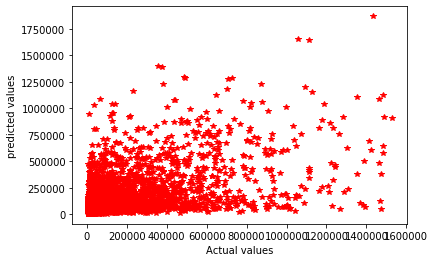

In [33]:
predictions=[]
for pred in estimator.predict(input_fn=test_input_func):
    predictions.append(np.array(pred['predictions']).astype(float))
plt.plot(y_test, predictions, 'r*')
plt.xlabel('Actual values')
plt.ylabel('predicted values')

In [34]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))**0.5
rmse

338.7188027093316

In [35]:
total_error= tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))